<a href="https://colab.research.google.com/github/leticiaram/Modelacion-Epidemiologica/blob/main/8_Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes_Networkx

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

**Red ejemplo: club de karate de Zachary**

Una de las redes listas para usar disponibles en NetworkX: "el club de karate de Zachary"(Zachary, 1977). Esta red representa las amistades (arcos) entre miembros (nodos) de un club de karate estudiado entre 1970 y 1972. Este club de karate en particular ha sido de interés durante mucho tiempo para los sociólogos y científicos de la red, porque finalmente se dividió en dos clubes diferentes después de un desacuerdo entre el instructor y el presidente del club (esto podría explicar por qué no hay estudios famosos sobre clubes de resolución de conflictos). En el estudio original, Zachary usó la estructura de la red para predecir qué miembros se unirían a cuál de los dos clubes con una precisión casi perfecta. Específicamente, usó el algoritmo de corte mínimo. En el artículo de Zachary, el nodo con el ID 0 se identificó como el instructor del club.


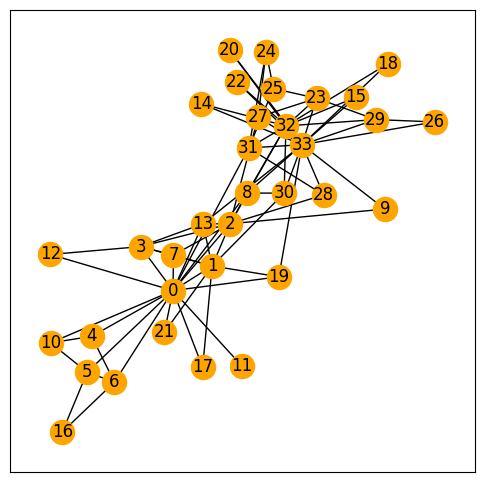

In [2]:
G = nx.karate_club_graph()
plt.figure(1,figsize=(6,6))
nx.draw_networkx(G,node_color="orange")

## Nodos y Aristas

In [3]:
list(G.nodes)[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
list(G.edges)[0:10]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11)]

## Diámetro

In [ ]:
nx.diameter(G)

## Coeficiente de agrupamiento

In [5]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [6]:
nx.average_clustering(G)

0.5706384782076823

## Centralidad

### De grado

In [7]:
G.degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [11]:
np.max(list(dict(G.degree).values()))

17

In [12]:
max(G.degree)

(33, 17)

<BarContainer object of 11 artists>

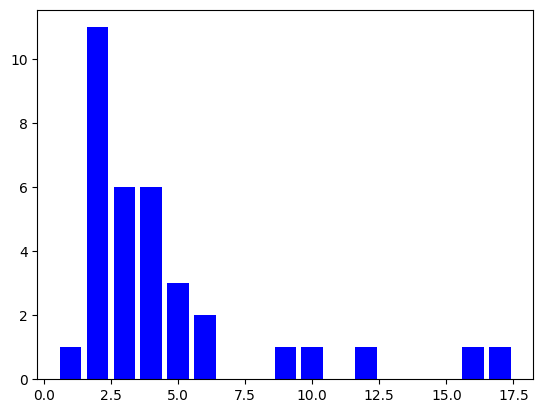

In [8]:
degree_sequence = sorted([d for n,d in G.degree()], reverse=True)
import collections
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

### Eigen centralidad

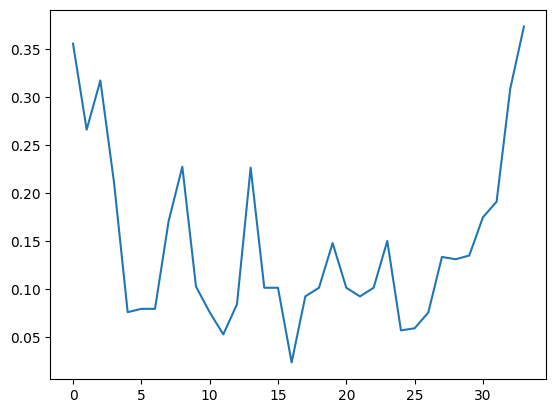

In [14]:
ec=nx.eigenvector_centrality(G, max_iter=10000)
lists = sorted(ec.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

In [15]:
max(nx.eigenvector_centrality(G, max_iter=10000))

33

## Asortatividad

In [16]:
nx.degree_assortativity_coefficient(G)

-0.47561309768461413

# Redes Aleatorias

### Erdos-Renyi I: G(n,m)

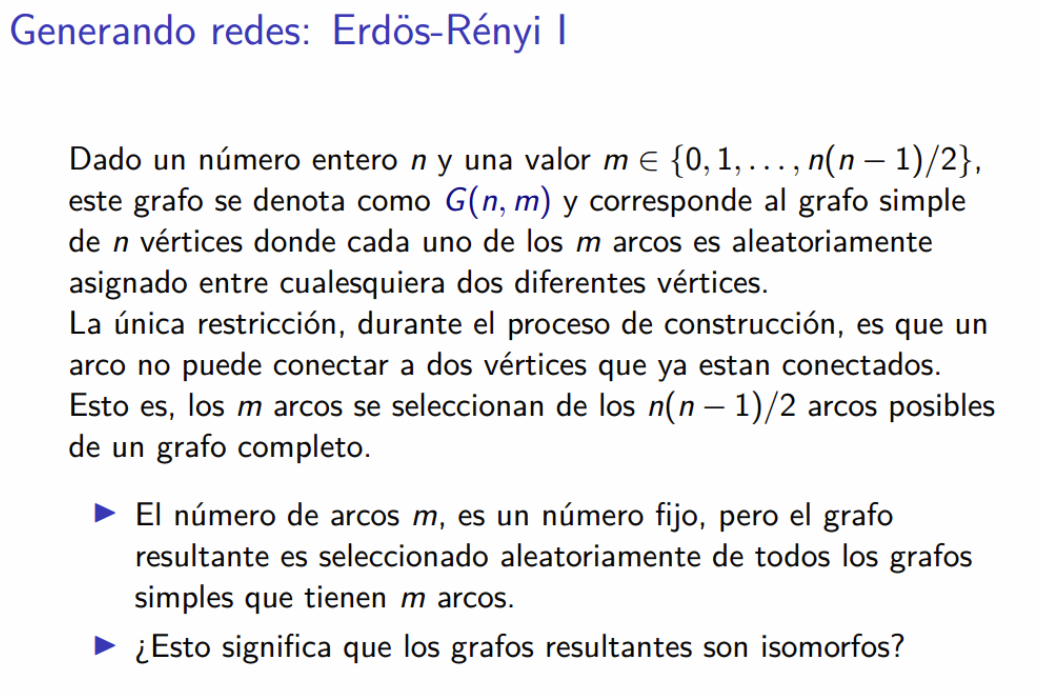

In [20]:
n = 10  # vertices
m = 20  # arcos
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnm_random_graph(n, m, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 9 5 6
1 4 7 8 6 2
2 4 5 7
3 5 4 6 9
4 9 7
5 7
6
7 8
8 9
9


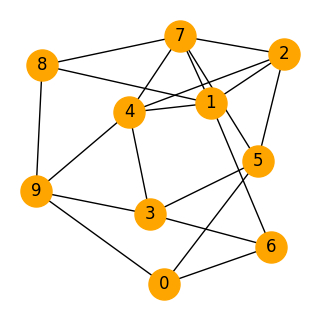

In [22]:
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
nx.draw(G, with_labels=True,node_color="orange",pos=pos,node_size=500)
plt.show()

In [28]:
print("Matriz de Adyacencias")
A = nx.adjacency_matrix(G)
A.toarray()

Matriz de Adyacencias


array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

### Erdos-Renyi II: G(n,p)

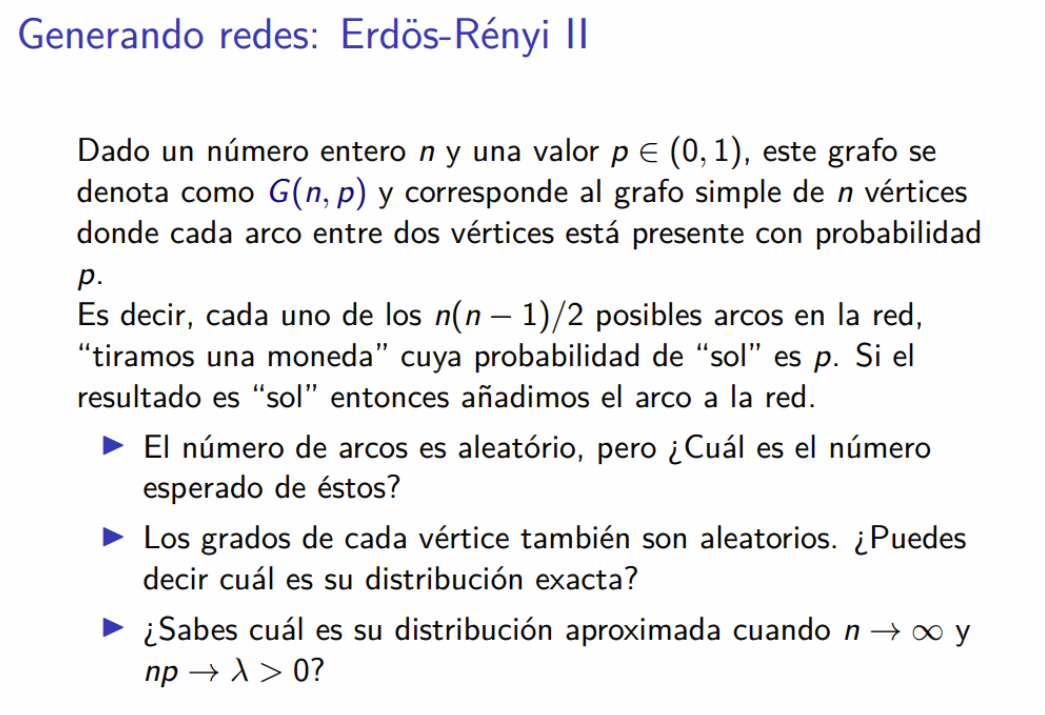

In [29]:
n = 10  # vertices
p = 0.5  # probability
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnp_random_graph(n, p, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 2 5 8 9
1 2 3 4 5 6 7 8 9
2 3 5 7
3 5 7 8
4 5 7 9
5 8
6 7 8
7 8
8 9
9


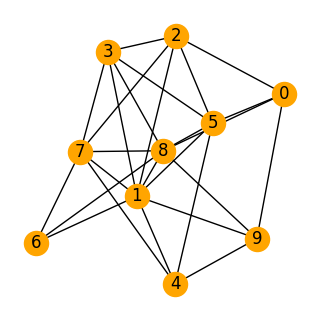

In [30]:
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
plt.figure(1,figsize=(3,3))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Barabasi-Albert

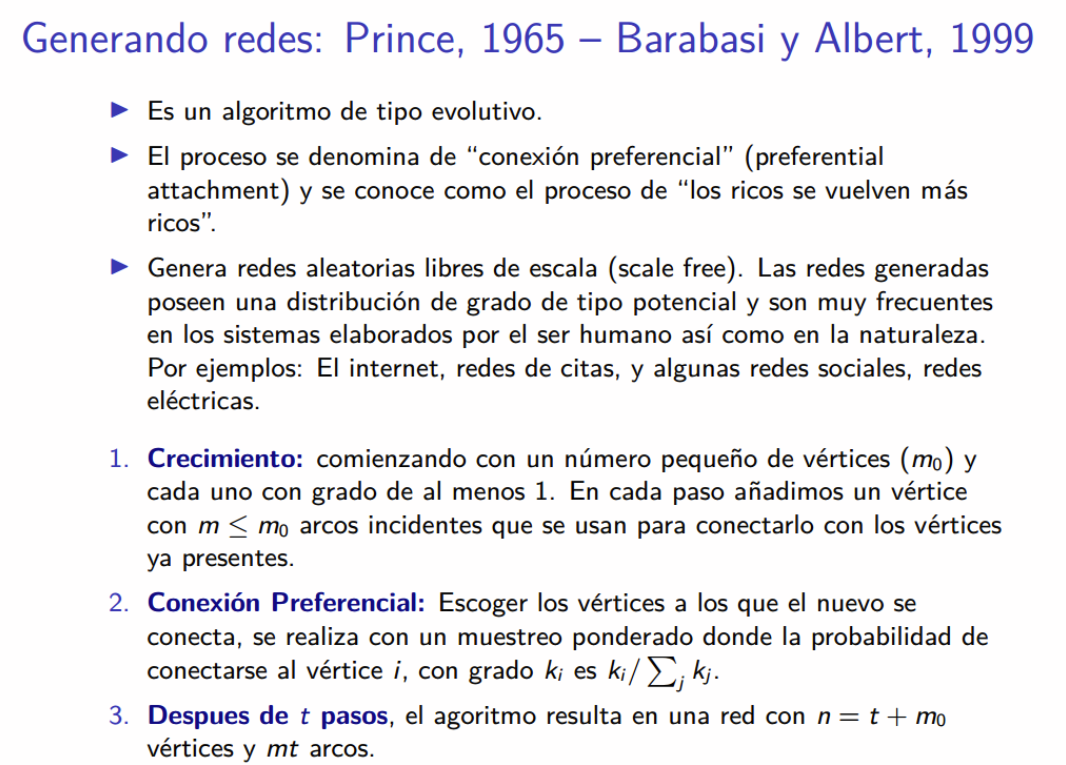

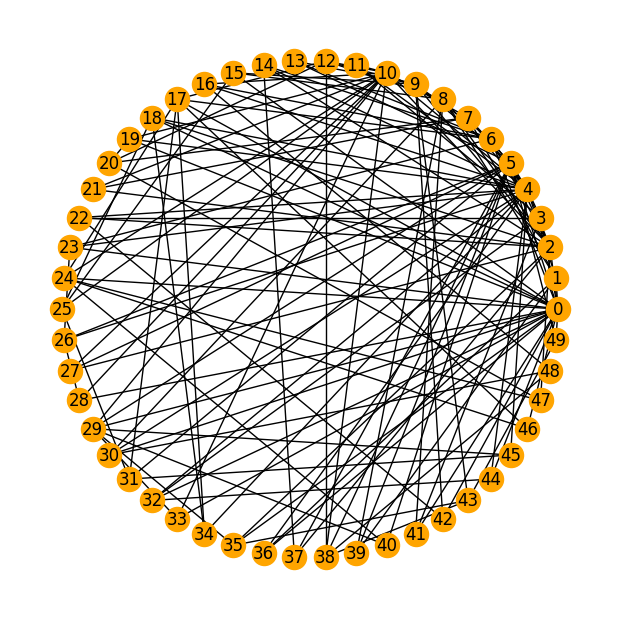

In [31]:
n = 50  # nodos
m = 3  # numero de arcos vertices de cada nuevo nodo
seed = 2016  # semilla para generador de números aleatorios

G = nx.barabasi_albert_graph(n, m, seed=seed)
pos = nx.circular_layout(G)  # posicion circular
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Watts-Strogatz

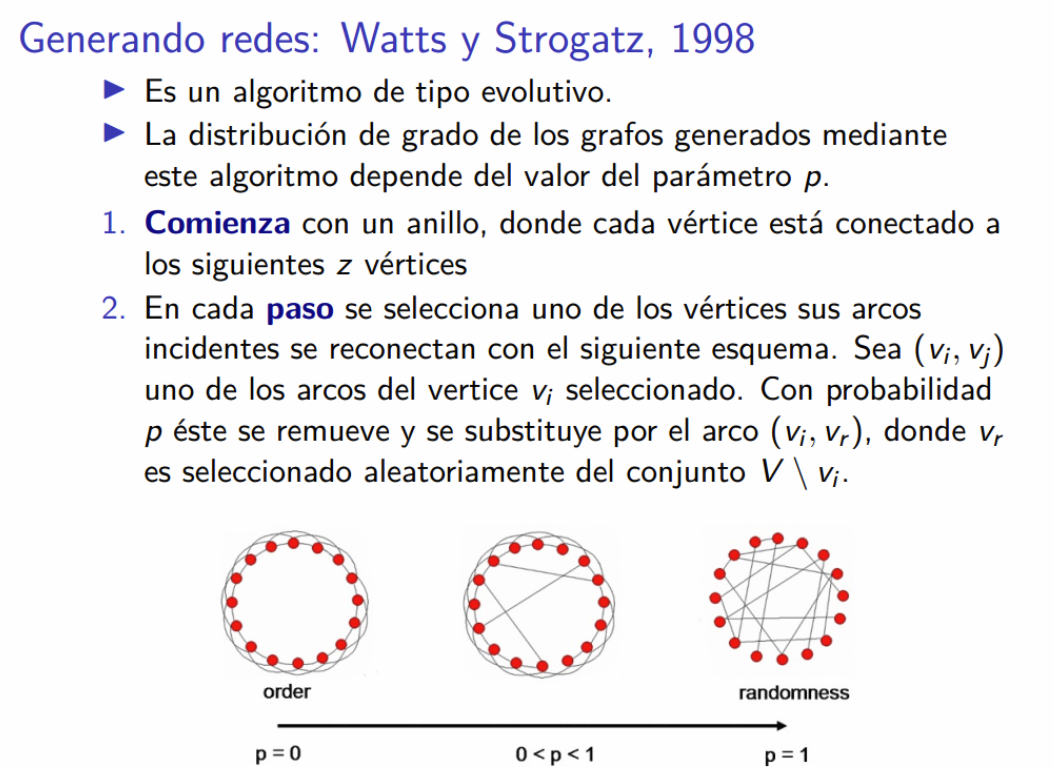

In [32]:
n = 20  # vertices
k = 4   # número de vecionos más cercanos a los que está conectado
p = 0.3   # probabilidad de reconexión
seed = 2016  # semilla para generador de números aleatorios

G = nx.watts_strogatz_graph(n, k, p,seed=seed)

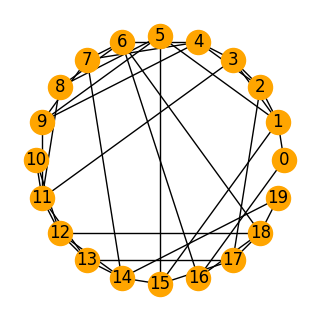

In [33]:
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(G)  # posición circular
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Modelo de Configuración para generar redes

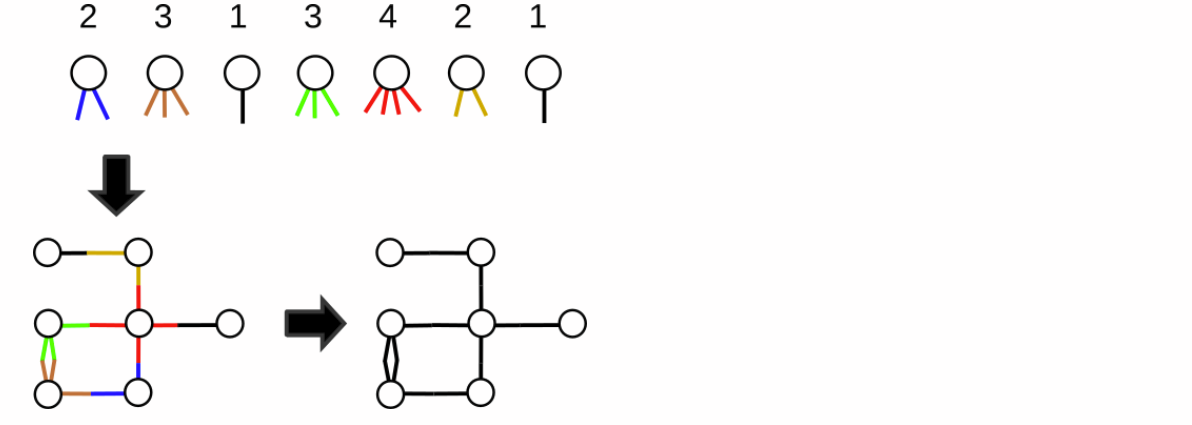

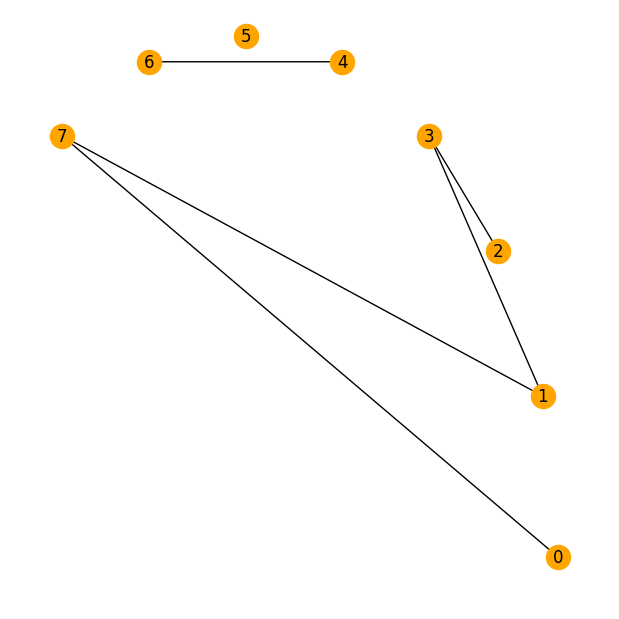

In [34]:
ks=[1,2,1,2,1,0,1,2]
G = nx.configuration_model(ks)
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

In [37]:
import numpy as np
np.random.seed(4)
k = np.random.poisson(5, 100)  #generamos 100 vertices con grado Poisson(5)
print("Sucesión de Grados")
print(k)
sg = k.tolist()
print("La suma de grados debe ser par")
print(sum(sg))
G = nx.configuration_model(sg)

Sucesión de Grados
[ 7  6  1  5  4  6  8  7  5  9  6  5  7  6  5  8  2 11  2  7  4  8  4  7
  5  7  3  4  8  5  4  4  5 11  4  3  5  4  3  3  5  6  5  8  7  5  7  3
  3  3  4  8  6  6  2  3  3  9  9  6 11  3  3  5  3  7  5  5  5  4  8  3
  8  6 11  6  8  9  3  4  2  1  4  6  1  7  6  2  7  7  7  1  5  4  3  5
  2  1  6  2]
La suma de grados debe ser par
522


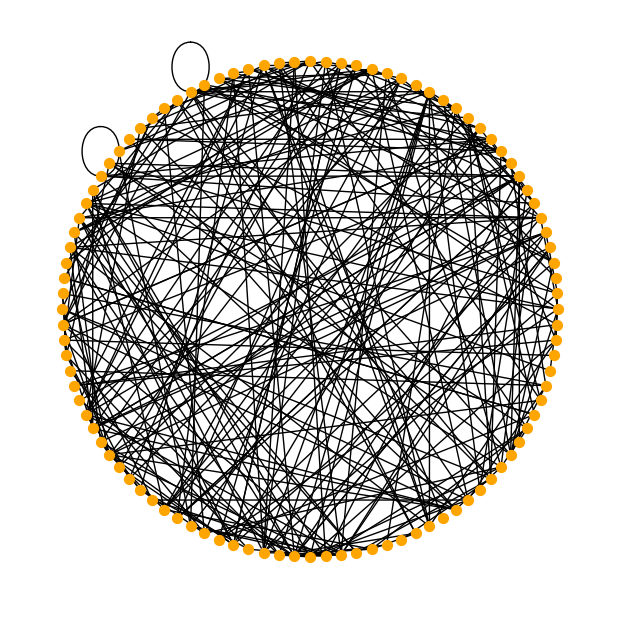

In [38]:
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=False,node_color="orange",pos=nx.circular_layout(G),node_size=50)

<BarContainer object of 10 artists>

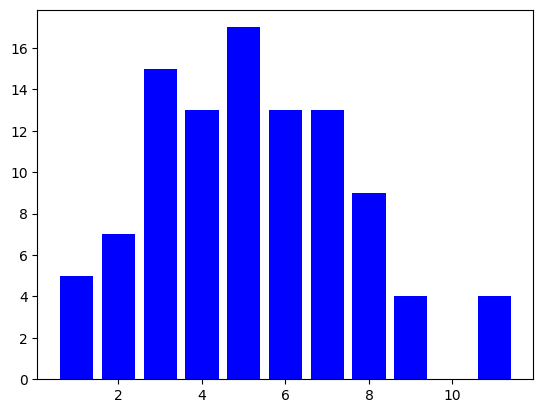

In [39]:
degree_sequence = sorted([d for n,d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')